# Generalized Linear Models for Count Data (Lab 1)

### Intro and objectives


### In this lab you will learn:
1. examples of generalized linear models
2. how to fit these models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit generalized linear models
* Worked Examples
* How to interpret the results obtained

In [2]:
!pip install wooldridge
!pip install linearmodels
import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import linearmodels as plm
import numpy as np
from scipy import stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Example. Title?

#### Students want to feel safe and secure when attending a college or university. In response to legislation, the US Department of Education seeks to provide data and reassurances to students and parents alike. All postsecondary institutions that participate in federal student aid programs are required by the Jeanne Clery Disclosure of Campus Security Policy and Campus Crime Statistics Act and the Higher Education Opportunity Act to collect and report data on crime occurring on campus to the Department of Education. In turn, this data is publicly available on the website of the Office of Postsecondary Education. We are interested in looking at whether there are regional differences in violent crime on campus, controlling for differences in the type of school.

#### Each row of c_data.csv contains crime information from a post secondary institution, either a college or university. The variables include:

1. Enrollment = enrollment at the school
2. type = college (C) or university (U)
3. nv = the number of violent crimes for that institution for the given year
4. nvrate = number of violent crimes per 1000 students
5. enroll1000 = enrollment at the school, in thousands
6. region = region of the country (C = Central, MW = Midwest, NE = Northeast, SE = Southeast, SW = Southwest, and W = West)




In [5]:
CampusDataFrame=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/M4DS202/main/data/campusdata.csv')

In [6]:
CampusDataFrame

,Enrollment,type,nv,nvrate,enroll1000,region
0,5590,U,30,5.366726,5.590,SE
1,540,C,0,0.000000,0.540,SE
2,35747,U,23,0.643411,35.747,W
3,28176,C,1,0.035491,28.176,W
4,10568,U,1,0.094625,10.568,SW
...,...,...,...,...,...,...
76,3072,C,3,0.976562,3.072,NE
77,40922,U,13,0.317678,40.922,MW
78,10549,U,7,0.663570,10.549,MW
79,12366,U,0,0.000000,12.366,C


In [8]:
CampusDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Enrollment  81 non-null     int64  
 1   type        81 non-null     object 
 2   nv          81 non-null     int64  
 3   nvrate      81 non-null     float64
 4   enroll1000  81 non-null     float64
 5   region      81 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.9+ KB


In [11]:
CampusDataFrame.describe()

,Enrollment,nv,nvrate,enroll1000
count,81.000000,81.000000,81.000000,81.000000
mean,13899.308642,5.938272,0.497859,13.899309
std,10501.866624,7.404974,0.790635,10.501867
min,540.000000,0.000000,0.000000,0.540000
25%,4638.000000,1.000000,0.074918,4.638000
50%,11321.000000,3.000000,0.248880,11.321000
75%,22396.000000,8.000000,0.643411,22.396000
max,46597.000000,30.000000,5.366726,46.597000


### 1. Exploratory Data Analysis

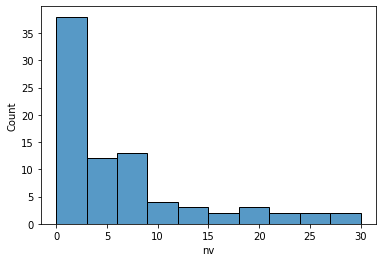

In [12]:
sns.histplot(CampusDataFrame,x='nv')

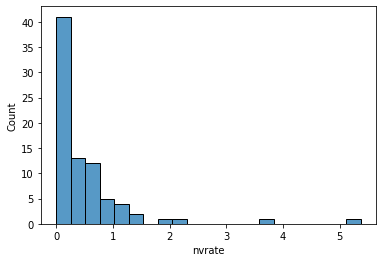

In [13]:
sns.histplot(CampusDataFrame,x='nvrate')

####  Previous graphs reveal the pattern often found with distributions of counts of rare events. 

#### Many schools reported no violent crimes or very few crimes. A few schools have a large number of crimes making for a distribution that appears to be far from normal. Therefore, Poisson regression should be used to model our data. Poisson random variables are often used to represent counts (e.g., number of violent crimes) per unit of time or space (e.g., one year).

In [29]:
CampusDataFrame

,Enrollment,type,nv,nvrate,enroll1000,region,log_Enrollment
0,5590,U,30,5.366726,5.590,SE,8.628735
1,540,C,0,0.000000,0.540,SE,6.291569
2,35747,U,23,0.643411,35.747,W,10.484222
3,28176,C,1,0.035491,28.176,W,10.246226
4,10568,U,1,0.094625,10.568,SW,9.265586
...,...,...,...,...,...,...,...
76,3072,C,3,0.976562,3.072,NE,8.030084
77,40922,U,13,0.317678,40.922,MW,10.619423
78,10549,U,7,0.663570,10.549,MW,9.263786
79,12366,U,0,0.000000,12.366,C,9.422706


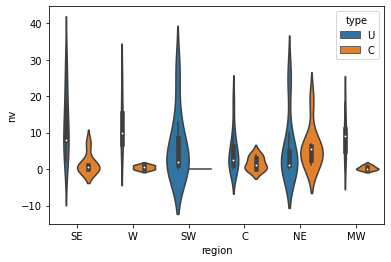

In [31]:
sns.violinplot(data=CampusDataFrame,x='region',y='nv',hue='type' )

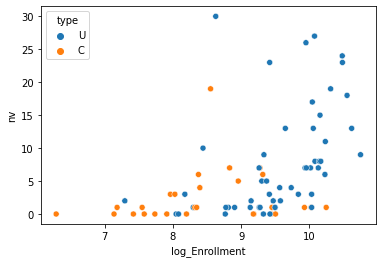

In [34]:
sns.scatterplot(data=CampusDataFrame, x='log_Enrollment',y='nv',hue='type')

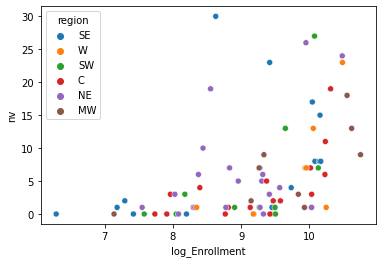

In [35]:
sns.scatterplot(data=CampusDataFrame, x='log_Enrollment',y='nv',hue='region')

In [14]:
# Compute the correlation matrix
corr = CampusDataFrame.corr()
round(corr,3)

,Enrollment,nv,nvrate,enroll1000
Enrollment,1.000,0.501,-0.120,1.000
nv,0.501,1.000,0.647,0.501
nvrate,-0.120,0.647,1.000,-0.120
enroll1000,1.000,0.501,-0.120,1.000


#### We observe moderate levels of correlation the response variable "nvrate" and enrollment

In [15]:
CampusDataFrame

,Enrollment,type,nv,nvrate,enroll1000,region
0,5590,U,30,5.366726,5.590,SE
1,540,C,0,0.000000,0.540,SE
2,35747,U,23,0.643411,35.747,W
3,28176,C,1,0.035491,28.176,W
4,10568,U,1,0.094625,10.568,SW
...,...,...,...,...,...,...
76,3072,C,3,0.976562,3.072,NE
77,40922,U,13,0.317678,40.922,MW
78,10549,U,7,0.663570,10.549,MW
79,12366,U,0,0.000000,12.366,C


In [18]:
CampusDataFrame.groupby('type').mean()

,Enrollment,nv,nvrate,enroll1000
type,,,,
C,7550.714286,2.428571,0.457261,7.550714
U,17253.283019,7.792453,0.519307,17.253283


In [26]:
CampusDataFrame.groupby('region').mean()

,Enrollment,nv,nvrate,enroll1000,log_Enrollment
region,,,,,
C,14092.294118,3.823529,0.273711,14.092294,9.259670
MW,20727.600000,6.200000,0.286209,20.727600,9.575677
NE,10232.476190,5.952381,0.698427,10.232476,8.970941
SE,12734.466667,8.266667,0.839777,12.734467,8.899891
SW,11764.400000,5.300000,0.340393,11.764400,9.082999
W,19432.000000,6.500000,0.267982,19.432000,9.705722


#### From the previous tables we observe a large variation of enrollment and violence rates accross types of centers and regions. 

#### It is usually advisable to standarize the dataset before modelling to avoid statistical issues. In this case we will use the log of enrollment instead.

In [25]:
CampusDataFrame['log_Enrollment']=np.log(CampusDataFrame['Enrollment'])

## 1. Initial model

#### We will assume that the random variable approve follows a poisson distribution with parameter $\mu$
$Y_i\sim Poisson(\mu)$


#### We assume a log function, this means that we are assuming that the log odds of the mean can be modeled as a linear combination of the factors under consideration.

$ log(\mu)=\beta_0+\beta_1*x_1+\ldots+\beta_p*X_p $


## 2. Estimation of the parameters

#### We are interested primarily in differences in violent crime between institutional types controlling for difference in regions, so we fit a model with region and institutional type,

In [27]:
CampusDataFrame

,Enrollment,type,nv,nvrate,enroll1000,region,log_Enrollment
0,5590,U,30,5.366726,5.590,SE,8.628735
1,540,C,0,0.000000,0.540,SE,6.291569
2,35747,U,23,0.643411,35.747,W,10.484222
3,28176,C,1,0.035491,28.176,W,10.246226
4,10568,U,1,0.094625,10.568,SW,9.265586
...,...,...,...,...,...,...,...
76,3072,C,3,0.976562,3.072,NE,8.030084
77,40922,U,13,0.317678,40.922,MW,10.619423
78,10549,U,7,0.663570,10.549,MW,9.263786
79,12366,U,0,0.000000,12.366,C,9.422706


In [28]:
reg1 = smf.glm(formula='nv ~ C(type)+region+log_Enrollment', data=CampusDataFrame,family=sm.families.Poisson())

# We fit the model
results1 = reg1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     nv   No. Observations:                   81
Model:                            GLM   Df Residuals:                       73
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -314.50
Date:                Sat, 21 Jan 2023   Deviance:                       411.13
Time:                        11:58:39   Pearson chi2:                     498.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.7174      0.713     -8.014      0.000      -7.116      -4.319
C(type)[T.U]       0.5813      0.147      3.962      0.000       0.294       0.869
region[T.MW]       0.2298      0.180      1.274      0.203      -0.124       0.583
region[T.NE]       0.7067      0.154      4.580      0.000       0.404       1.009
region[T.SE]       0.8891      0.153      5.804      0.000       0.589       1.189
region[T.SW]       0.4381      0.186      2.357      0.018       0.074       0.802
region[T.W]        0.3933      0.190      2.070      0.038       0.021       0.766
log_Enrollment     0.6919      0.077      8.965      0.000       0.541       0.843
==================================================================================
"""

## 3. Model interpretation:


#### We observe that there is a strong and statistically effect of the type of school and violent crime rate (0.5813, p-value:0.000). The log mean of violent crime rate in University schools is 0.58 larger than in Colleges (the base category).

#### We observe that there is a strong and statistically effect of the enrollment and violent crime rate (0.6919, p-value:0.000). One percent change in enrollment drives 0.69% change in the log mean of violent crime.

#### Violent crime rate varies accross regions:

1. Chaging from the Central Region (the base category) to the North East Region increases the log mean of violent crime by 0.7067 points.
2. Chaging from the Central Region (the base category) to the Mid West Region increases the log mean of violent crime by 0.2298 points.

## 4. Model with interactions

#### We might be interested in exploring variations acrross regions and school types. For this we need to add an interaction term

In [40]:
reg2 = smf.glm(formula='nv ~ log_Enrollment+type*region', data=CampusDataFrame,family=sm.families.Poisson())

# We fit the model
results2 = reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     nv   No. Observations:                   81
Model:                            GLM   Df Residuals:                       68
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -276.09
Date:                Sat, 21 Jan 2023   Deviance:                       334.30
Time:                        12:48:55   Pearson chi2:                     393.
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -5.8645      0.826     -7.101      0.000      -7.483      -4.246
type[T.U]                  0.3676      0.382      0.962      0.336      -0.382       1.117
region[T.MW]              -1.8879      1.061     -1.779      0.075      -3.968       0.192
region[T.NE]               1.4175      0.383      3.699      0.000       0.666       2.169
region[T.SE]               0.1634      0.486      0.336      0.737      -0.790       1.117
region[T.SW]             -21.3189   1.38e+04     -0.002      0.999    -2.7e+04    2.69e+04
region[T.W]               -1.7055      0.792     -2.154      0.031      -3.258      -0.153
type[T.U]:region[T.MW]     2.2271      1.077      2.069      0.039       0.117       4.337
type[T.U]:region[T.NE]    -0.9897      0.420     -2.355      0.019      -1.813      -0.166
type[T.U]:region[T.SE]     0.8059      0.513      1.571      0.116      -0.200       1.812
type[T.U]:region[T.SW]    21.8781   1.38e+04      0.002      0.999   -2.69e+04     2.7e+04
type[T.U]:region[T.W]      2.3705      0.814      2.912      0.004       0.775       3.966
log_Enrollment             0.7265      0.082      8.830      0.000       0.565       0.888
==========================================================================================
"""

#### The statistical significance of some of the previous interaction terms confirm that violent crime is different accross regions and schools.

###4. Ex-post Analysis

#### based on the results of the first model we conclude that violent crime rate depends on the type of school and region.

In [41]:
CampusDataFrame.columns.values

array(['Enrollment', 'type', 'nv', 'nvrate', 'enroll1000', 'region',
       'log_Enrollment'], dtype=object)

In [48]:
X=CampusDataFrame[['type', 'region','log_Enrollment']]





In [49]:
Y_predicted=pd.Series(results1.predict(X))
Y_predicted.rename("nv_predicted",inplace=True);

In [50]:
CampusDataFramePredictions=pd.concat([X,Y_predicted],axis=1)

In [51]:
CampusDataFramePredictions

,type,region,log_Enrollment,nv_predicted
0,U,SE,8.628735,5.601216
1,C,SE,6.291569,0.621660
2,U,W,10.484222,12.316322
3,C,W,10.246226,5.841136
4,U,SW,9.265586,5.543462
...,...,...,...,...
76,C,NE,8.030084,1.724642
77,U,MW,10.619423,11.484518
78,U,MW,9.263786,4.495515
79,U,C,9.422706,3.987575


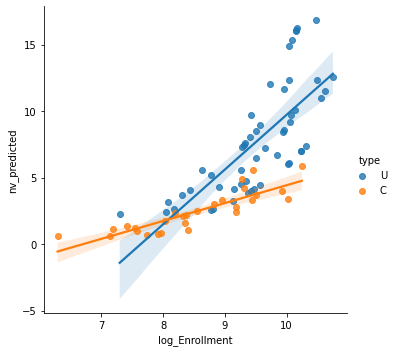

In [52]:
sns.lmplot(data=CampusDataFramePredictions,x="log_Enrollment", y="nv_predicted", hue="type",height=5)

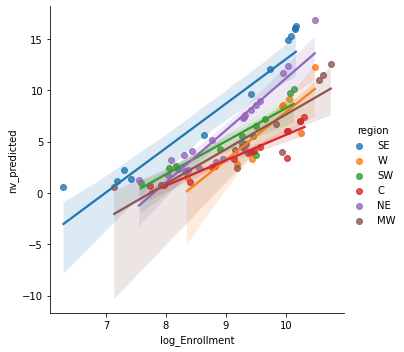

In [53]:
sns.lmplot(data=CampusDataFramePredictions,x="log_Enrollment", y="nv_predicted", hue="region",height=5)